In [27]:
# Building Regression Models with scikit-learn

In [2]:
# --- Exploring The Automobile Mpg Dataset
# Dataset from https://www.kaggle.com/datasets/roger1315/automobiles

In [3]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import datetime

In [4]:
automobile_df = pd.read_csv('datasets/auto-mpg/train.csv')

automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
364,26.6,8,350.0,105,3725,19.0,81,1,oldsmobile cutlass ls
300,23.9,8,260.0,90,3420,22.2,79,1,oldsmobile cutlass salon brougham
251,20.2,8,302.0,139,3570,12.8,78,1,mercury monarch ghia
335,35.0,4,122.0,88,2500,15.1,80,2,triumph tr7 coupe
385,38.0,4,91.0,67,1995,16.2,82,3,datsun 310 gx


In [5]:
automobile_df.shape

(398, 9)

In [6]:
# This dataset happens to use ? for empty values, replace them with np.nan to make them easier to drop
automobile_df = automobile_df.replace('?', np.nan)

In [7]:
# Drop na
automobile_df = automobile_df.dropna()

In [8]:
automobile_df.shape

(392, 9)

In [9]:
# Drop columns that intuitively have no predictive value
automobile_df.drop(['origin', 'car name'], axis=1, inplace=True)

In [10]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
316,19.1,6,225.0,90,3381,18.7,80
113,21.0,6,155.0,107,2472,14.0,73
285,17.0,8,305.0,130,3840,15.4,79
364,26.6,8,350.0,105,3725,19.0,81
25,10.0,8,360.0,215,4615,14.0,70


In [11]:
# We want to calculate age of vehicle, so format two digit year into four digit year
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
45,18.0,6,258.0,110,2962,13.5,1971
170,23.0,4,140.0,78,2592,18.5,1975
9,15.0,8,390.0,190,3850,8.5,1970
75,14.0,8,318.0,150,4077,14.0,1972
113,21.0,6,155.0,107,2472,14.0,1973


In [12]:
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age
118,24.0,4,116.0,75,2158,15.5,1973,50
262,19.2,8,305.0,145,3425,13.2,1978,45
152,19.0,6,225.0,95,3264,16.0,1975,48
2,18.0,8,318.0,150,3436,11.0,1970,53
167,29.0,4,97.0,75,2171,16.0,1975,48


In [13]:
automobile_df.drop(['model year'], axis=1, inplace=True)
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
12,15.0,8,400.0,150,3761,9.5,53
143,26.0,4,97.0,78,2300,14.5,49
361,25.4,6,168.0,116,2900,12.6,42
301,34.2,4,105.0,70,2200,13.2,44
81,28.0,4,97.0,92,2288,17.0,51


In [14]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [15]:
# Horsepower needs to be converted from object to numeric (all features need to be numeric)
# It appears to already be numeric and just needs the conversion (maybe was impacted by the ?s)
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [16]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,47.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,41.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,44.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,47.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,50.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,53.000000


In [17]:
# --- Visualizing Relationships and Correlations in Features

Text(0, 0.5, 'Miles Per Gallon')

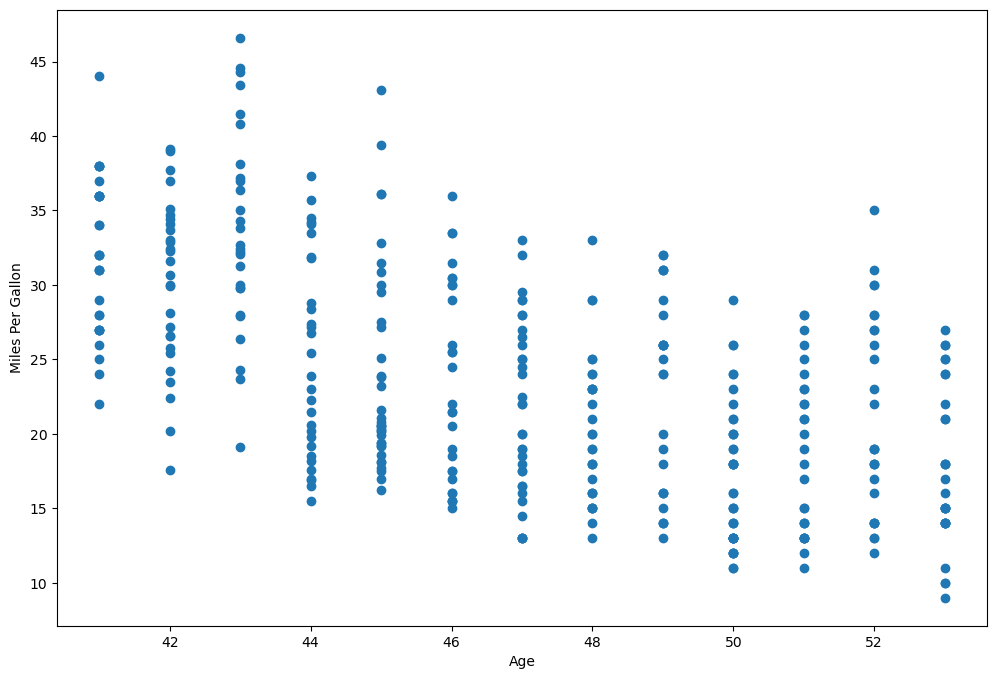

In [18]:
# Visualize age against MPG
fix, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['age'], automobile_df['mpg'])

plt.xlabel('Age')
plt.ylabel('Miles Per Gallon')

Text(0, 0.5, 'Miles Per Gallon')

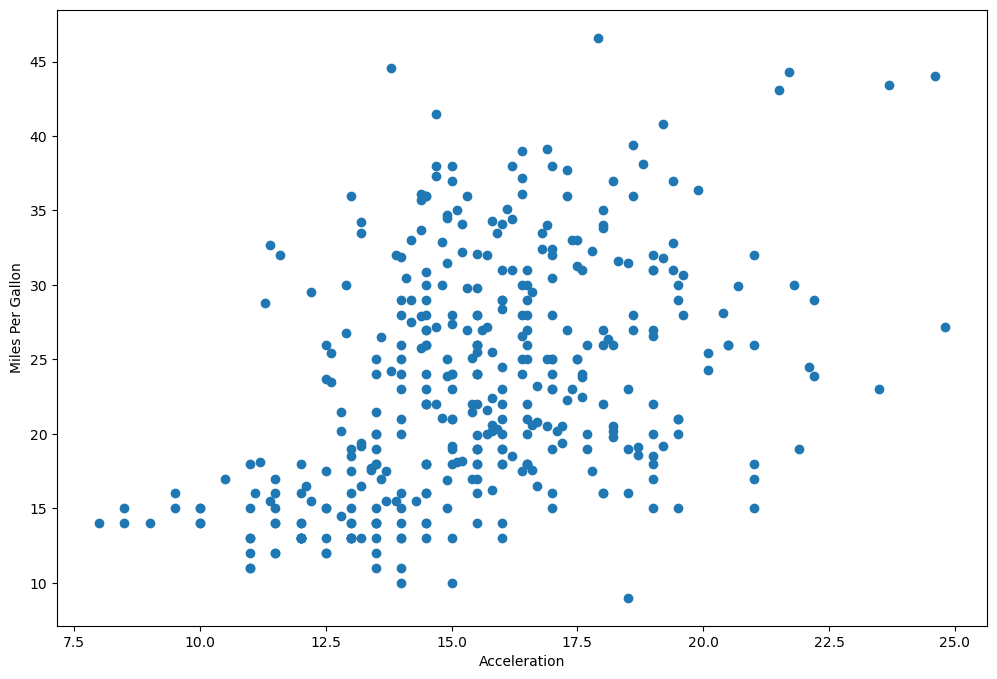

In [19]:
# Visualize acceleration against MPG
fix, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])

plt.xlabel('Acceleration')
plt.ylabel('Miles Per Gallon')

Text(0, 0.5, 'Miles Per Gallon')

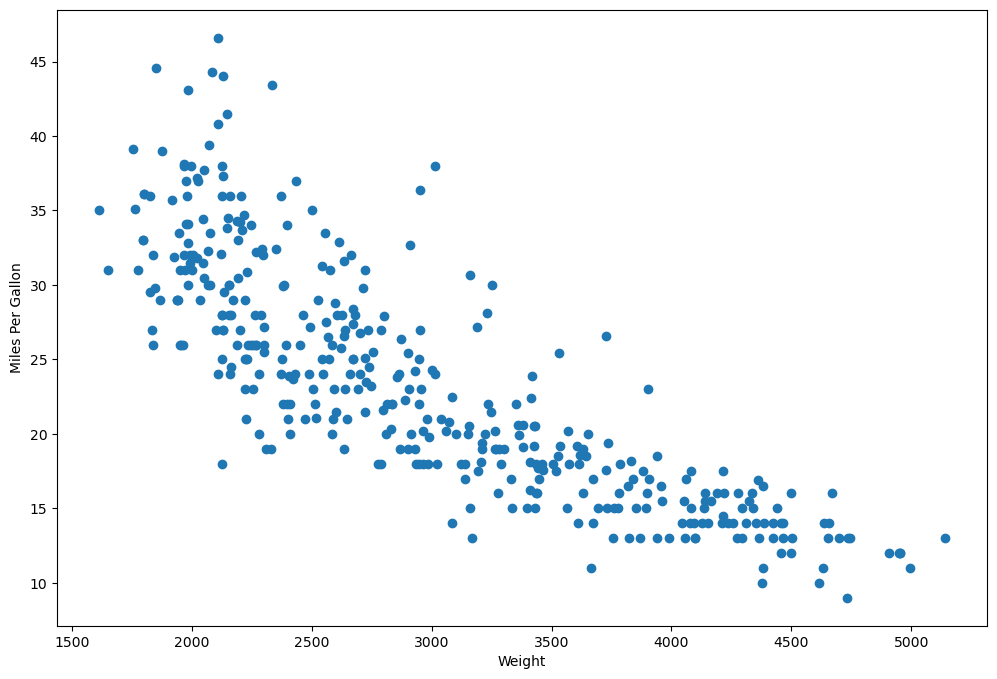

In [20]:
# Visualize weight against MPG
fix, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['weight'], automobile_df['mpg'])

plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon')

In [21]:
# We could visualize additional features but we won't...

In [22]:
automobile_corr = automobile_df.corr()

automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


<Axes: >

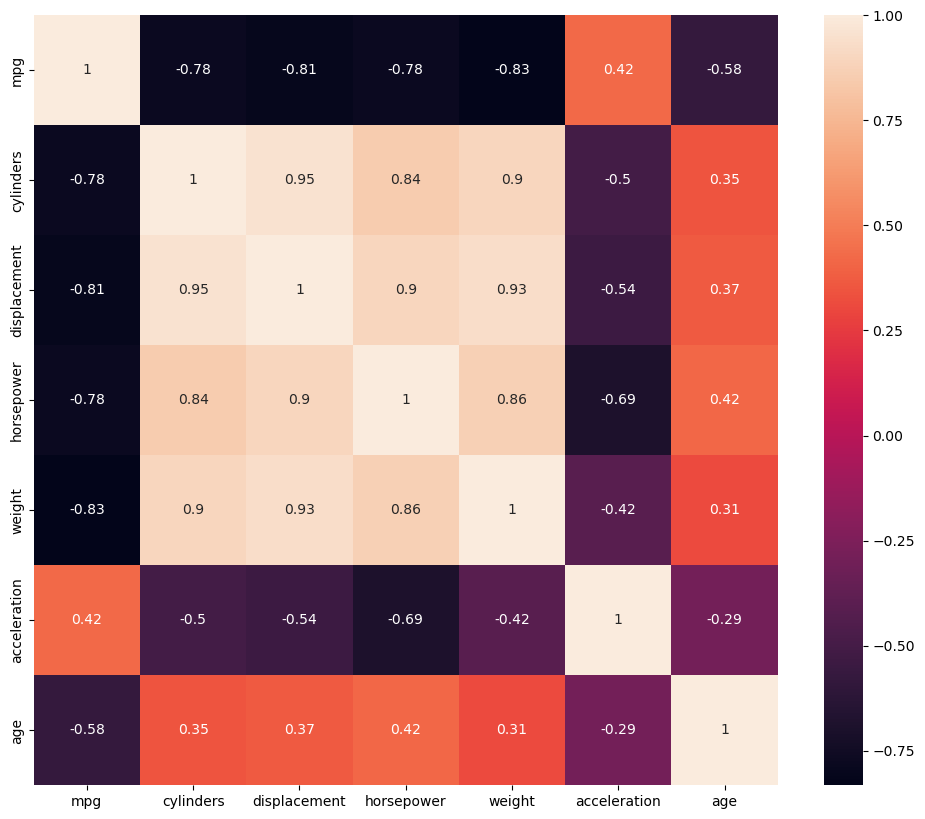

In [23]:
# Visualize correlation as heatmap
fix, ax = plt.subplots(figsize=(12,10))

sns.heatmap(automobile_corr, annot=True)

In [24]:
# Shuffle the data before passing to ML training to prevent identifying arbitrary patterns from order
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,31.9,4,89.0,71,1925,14.0,44
1,20.0,6,198.0,95,3102,16.5,49
2,16.0,6,250.0,100,3278,18.0,50
3,26.0,4,116.0,75,2246,14.0,49
4,16.2,6,163.0,133,3410,15.8,45


In [25]:
automobile_df.to_csv('datasets/auto-mpg-processed.csv', index=False)

In [26]:
!ls datasets

auto-mpg               auto-mpg-processed.csv
